#### Question 1
1. Find a way to represent the entire time series in a single file. You may either save a visualization for every data on separate pages in a pdf or you may create an MP4 or GIF file. Make sure that for every frame, the correct date is indicated. See how to accomplish this here. Differentiate your answer from the template provided in at least 3 ways. Identify how your output is differentiated.¶

In [1]:
# we will import a shapefile to use with geopandas, which we will later use to generate a county level map that tracks COVID-19

In [2]:
import numpy as np
import pandas as pd
import geopandas

# download the data 
import datadotworld as dw

import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

# visualization for homework 
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

In [3]:
import numpy as np
import pandas as pd
import geopandas
import datetime

import datadotworld as dw

def import_covid_data(FIPS_name):
    # Load COVID19 county data using datadotworld API
    # Data provided by John Hopkins, file provided 
    # by Associated Press
    dataset = dw.load_dataset(
        "associatedpress/johns-hopkins-coronavirus-case-tracker",
        auto_update = True)
    
    #the dataset includes multiple dataframes. We will only use #2
    covid_data = dataset.dataframes[
        "2_cases_and_deaths_by_county_timeseries"]
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]
    # Transform FIPS codes into integers
    covid_data[FIPS_name] = covid_data[FIPS_name].astype(int)
    covid_data.set_index([FIPS_name, "date"], inplace = True)
    
    # Prepare a column for state abbreviations. we will draw these 
    # from state_dict
    covid_data["state_abr"] = ""
    for state, abr in state_dict.items():
        #.loc[row(s), col]
        covid_data.loc[
            covid_data["state"] == state, "state_abr"] = abr
    # save location name as Cass, ND 
    covid_data["Location"] = covid_data["location_name"] + ", " +\
        covid_data["state_abr"]
    return covid_data

def import_geo_data(filename, index_col = "Date", 
                    FIPS_name = "FIPS"):
    # import county level shapefile
    map_data = geopandas.read_file(filename = filename, 
                                  index_col = index_col)
    map_data.rename(columns = {"State":"state"},
                   inplace = True)
    # Combine statefips and county fips to create a single fips value
    # that identifies each particular county without referencing the
    # state separately
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +\
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data

state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 
    'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
    'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
    'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 
    'Wyoming': 'WY'}


In [4]:
fips_name = "fips_code"
# rename_FIPS matches map_data FIPS with COVID19 FIPS name
covid_data = import_covid_data(FIPS_name = fips_name)

C:\Users\Shane\anaconda3\lib\site-packages\datadotworld\models\dataset.py:206: UserWarning: Unable to set data frame dtypes automatically using 2_cases_and_deaths_by_county_timeseries schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 2
  warnings.warn(


In [5]:
covid_data

uid location_type location_name    state  \
fips_code date                                                        
1001      2020-01-22  84001001        county       Autauga  Alabama   
          2020-01-23  84001001        county       Autauga  Alabama   
          2020-01-24  84001001        county       Autauga  Alabama   
          2020-01-25  84001001        county       Autauga  Alabama   
          2020-01-26  84001001        county       Autauga  Alabama   
...                        ...           ...           ...      ...   
56045     2020-11-28  84056045        county        Weston  Wyoming   
          2020-11-29  84056045        county        Weston  Wyoming   
          2020-11-30  84056045        county        Weston  Wyoming   
          2020-12-01  84056045        county        Weston  Wyoming   
          2020-12-02  84056045        county        Weston  Wyoming   

                      total_population  cumulative_cases  \
fips_code date                                             
1001      2020-01-22           55200.0                 0   
          2020-01-23           55200.0                 0   
          2020-01-24           55200.0                 0   
          2020-01-25           55200.0                 0   
          2020-01-26           55200.0                 0   
...                                ...               ...   
56045     2020-11-28            7100.0               396   
          2020-11-29            7100.0               396   
          2020-11-30            7100.0               397   
          2020-12-01            7100.0               409   
          2020-12-02            7100.0               415   

                      cumulative_cases_per_100_000  cumulative_deaths  \
fips_code date                                                          
1001      2020-01-22                          0.00                  0   
          2020-01-23                          0.00                  0   
          2020-01-24                          0.00                  0   
          2020-01-25                          0.00                  0   
          2020-01-26                          0.00                  0   
...                                            ...                ...   
56045     2020-11-28                       5577.46                  1   
          2020-11-29                       5577.46                  1   
          2020-11-30                       5591.55                  1   
          2020-12-01                       5760.56                  2   
          2020-12-02                       5845.07                  2   

                      cumulative_deaths_per_100_000  new_cases  new_deaths  \
fips_code date                                                               
1001      2020-01-22                           0.00        NaN         NaN   
          2020-01-23                           0.00        0.0         0.0   
          2020-01-24                           0.00        0.0         0.0   
          2020-01-25                           0.00        0.0         0.0   
          2020-01-26                           0.00        0.0         0.0   
...                                             ...        ...         ...   
56045     2020-11-28                          14.08        0.0         0.0   
          2020-11-29                          14.08        0.0         0.0   
          2020-11-30                          14.08        1.0         0.0   
          2020-12-01                          28.17       12.0         1.0   
          2020-12-02                          28.17        6.0         0.0   

                      new_cases_per_100_000  new_deaths_per_100_000  \
fips_code date                                                        
1001      2020-01-22                    NaN                     NaN   
          2020-01-23                   0.00                    0.00   
          2020-01-24                   0.00                    0.00   
  

In [6]:
map_data = import_geo_data(filename = "countiesWithStatesAndPopulation.shp",
                    index_col = "Date", FIPS_name= fips_name)

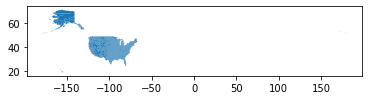

In [7]:
map_data.plot()

In [8]:
def create_merged_geo_dataframe(data, map_data, dates):
    data_frame_initialized = False
    counties =data.groupby("fips_code").mean().index
    for date in dates:
        # select county observations from each date in dates
        # select only the subset of counties in the map that
        # are also present in the covid_data
        agg_df = map_data.loc[counties]
        agg_df["date"] = date
        if data_frame_initialized == False:
            #Create new dataframe
            matching_gpd = geopandas.GeoDataFrame(agg_df, crs = map_data.crs)
            data_frame_initialized = True        
        
        else:
            # or stack thenew  data frame and the dataframe that was initialized at
            # i = 0
            matching_gpd = matching_gpd.append(agg_df, ignore_index = False)
    # reset index, then set to [fips, date]
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["fips_code", "date"], inplace = True)
    
    for key, val in data.items():
        matching_gpd[key] = val
    return matching_gpd

dates =covid_data.groupby("date").mean().index
covid_data = create_merged_geo_dataframe(covid_data, map_data, dates)
covid_data

,,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg,state_abr,Location
fips_code,date,,,,,,,,,,,,,,,,,,,,,
1001,2020-01-22,1,001,00161526,0500000US01001,Autauga,06,1539602123,25706961,55869.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Autauga, AL"
1003,2020-01-22,1,003,00161527,0500000US01003,Baldwin,06,4117546676,1133055836,223234.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Baldwin, AL"
1005,2020-01-22,1,005,00161528,0500000US01005,Barbour,06,2292144655,50538698,24686.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Barbour, AL"
1007,2020-01-22,1,007,00161529,0500000US01007,Bibb,06,1612167481,9602089,22394.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Bibb, AL"
1009,2020-01-22,1,009,00161530,0500000US01009,Blount,06,1670103911,15015423,57826.0,Alabama,...,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,AL,"Blount, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2020-12-02,56,037,01609192,0500000US56037,Sweetwater,06,27005754244,166230251,42343.0,Wyoming,...,6,13.60,31.0,0.0,70.27,0.0,48.00,0.00,WY,"Sweetwater, WY"
56039,2020-12-02,56,039,01605083,0500000US56039,Teton,06,10351784301,570864879,23464.0,Wyoming,...,2,8.67,23.0,0.0,99.74,0.0,28.86,0.00,WY,"Teton, WY"
56041,2020-12-02,56,041,01605084,0500000US56041,Uinta,06,5391631764,16625817,20226.0,Wyoming,...,4,19.41,32.0,0.0,155.27,0.0,15.00,0.00,WY,"Uinta, WY"


In [9]:
def create_new_vars(covid_data, moving_average_days):
    #use a for loop that performs the same ops for cases and deaths
    for key in ("cases", "deaths"):
        cap_key = key.title()
        covid_data[cap_key + " per Million"] = covid_data["cumulative_" + key]\
            .div(covid_data["total_population"]).mul(10 ** 6) 
        covid_data["Daily " + cap_key + " per Million"] = \
            covid_data["cumulative_" + key ].groupby(covid_data.index.names[0])\
            .diff(1).div(covid_data["total_population"]).mul(10 ** 6)
        covid_data["Daily " + cap_key + " per Million MA"] = covid_data["Daily " + \
                  cap_key + " per Million"].rolling(moving_average_days).mean()
        
moving_average_days = 7
create_new_vars(covid_data,moving_average_days)

covid_data

,,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg,state_abr,Location,Cases per Million,Daily Cases per Million,Daily Cases per Million MA,Deaths per Million,Daily Deaths per Million,Daily Deaths per Million MA
fips_code,date,,,,,,,,,,,,,,,,,,,,,
1001,2020-01-22,1,001,00161526,0500000US01001,Autauga,06,1539602123,25706961,55869.0,Alabama,...,NaN,NaN,AL,"Autauga, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1003,2020-01-22,1,003,00161527,0500000US01003,Baldwin,06,4117546676,1133055836,223234.0,Alabama,...,NaN,NaN,AL,"Baldwin, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1005,2020-01-22,1,005,00161528,0500000US01005,Barbour,06,2292144655,50538698,24686.0,Alabama,...,NaN,NaN,AL,"Barbour, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1007,2020-01-22,1,007,00161529,0500000US01007,Bibb,06,1612167481,9602089,22394.0,Alabama,...,NaN,NaN,AL,"Bibb, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1009,2020-01-22,1,009,00161530,0500000US01009,Blount,06,1670103911,15015423,57826.0,Alabama,...,NaN,NaN,AL,"Blount, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2020-12-02,56,037,01609192,0500000US56037,Sweetwater,06,27005754244,166230251,42343.0,Wyoming,...,48.00,0.00,WY,"Sweetwater, WY",43837.976290,702.676973,1032.510454,136.001995,0.0,0.0
56039,2020-12-02,56,039,01605083,0500000US56039,Teton,06,10351784301,570864879,23464.0,Wyoming,...,28.86,0.00,WY,"Teton, WY",72769.851251,997.441346,953.476918,86.734030,0.0,0.0
56041,2020-12-02,56,041,01605084,0500000US56041,Uinta,06,5391631764,16625817,20226.0,Wyoming,...,15.00,0.00,WY,"Uinta, WY",54393.711485,1552.719686,1000.223988,194.089961,0.0,0.0


In [10]:
covid_data

,,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg,state_abr,Location,Cases per Million,Daily Cases per Million,Daily Cases per Million MA,Deaths per Million,Daily Deaths per Million,Daily Deaths per Million MA
fips_code,date,,,,,,,,,,,,,,,,,,,,,
1001,2020-01-22,1,001,00161526,0500000US01001,Autauga,06,1539602123,25706961,55869.0,Alabama,...,NaN,NaN,AL,"Autauga, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1003,2020-01-22,1,003,00161527,0500000US01003,Baldwin,06,4117546676,1133055836,223234.0,Alabama,...,NaN,NaN,AL,"Baldwin, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1005,2020-01-22,1,005,00161528,0500000US01005,Barbour,06,2292144655,50538698,24686.0,Alabama,...,NaN,NaN,AL,"Barbour, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1007,2020-01-22,1,007,00161529,0500000US01007,Bibb,06,1612167481,9602089,22394.0,Alabama,...,NaN,NaN,AL,"Bibb, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
1009,2020-01-22,1,009,00161530,0500000US01009,Blount,06,1670103911,15015423,57826.0,Alabama,...,NaN,NaN,AL,"Blount, AL",0.000000,NaN,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2020-12-02,56,037,01609192,0500000US56037,Sweetwater,06,27005754244,166230251,42343.0,Wyoming,...,48.00,0.00,WY,"Sweetwater, WY",43837.976290,702.676973,1032.510454,136.001995,0.0,0.0
56039,2020-12-02,56,039,01605083,0500000US56039,Teton,06,10351784301,570864879,23464.0,Wyoming,...,28.86,0.00,WY,"Teton, WY",72769.851251,997.441346,953.476918,86.734030,0.0,0.0
56041,2020-12-02,56,041,01605084,0500000US56041,Uinta,06,5391631764,16625817,20226.0,Wyoming,...,15.00,0.00,WY,"Uinta, WY",54393.711485,1552.719686,1000.223988,194.089961,0.0,0.0


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

date = dates[-1]

#map bounds
if "map_bounded" not in locals():
    minx = -127
    miny = 23
    maxx = -66
    maxy = 48
    covid_data = select_data_within_bounds(covid_data, minx, miny, maxx, maxy)
    covid_map_bounded = True

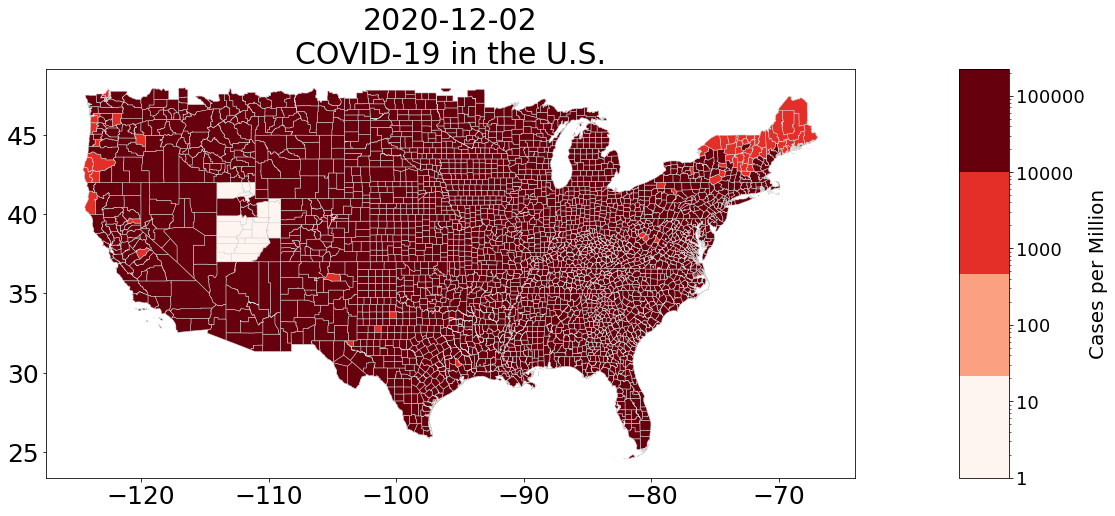

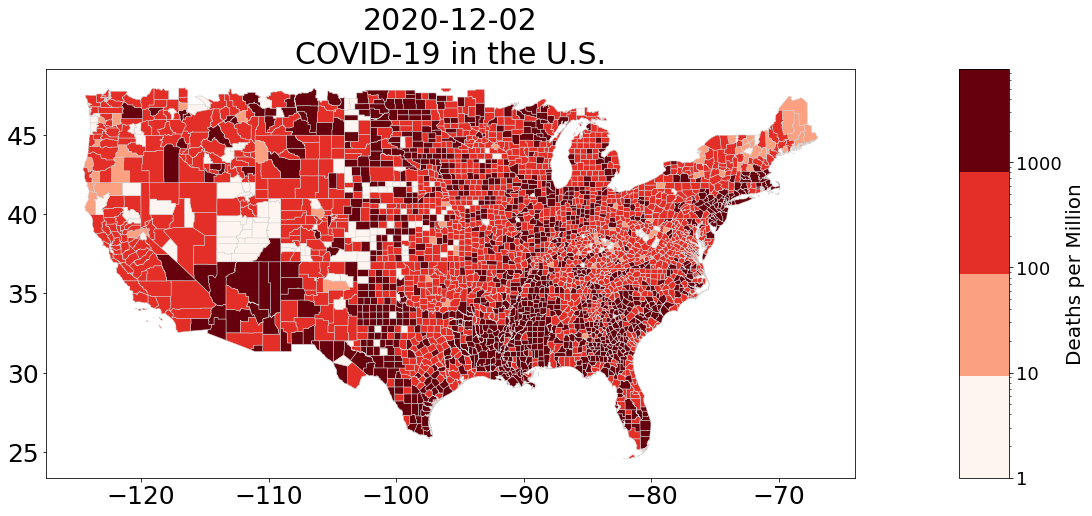

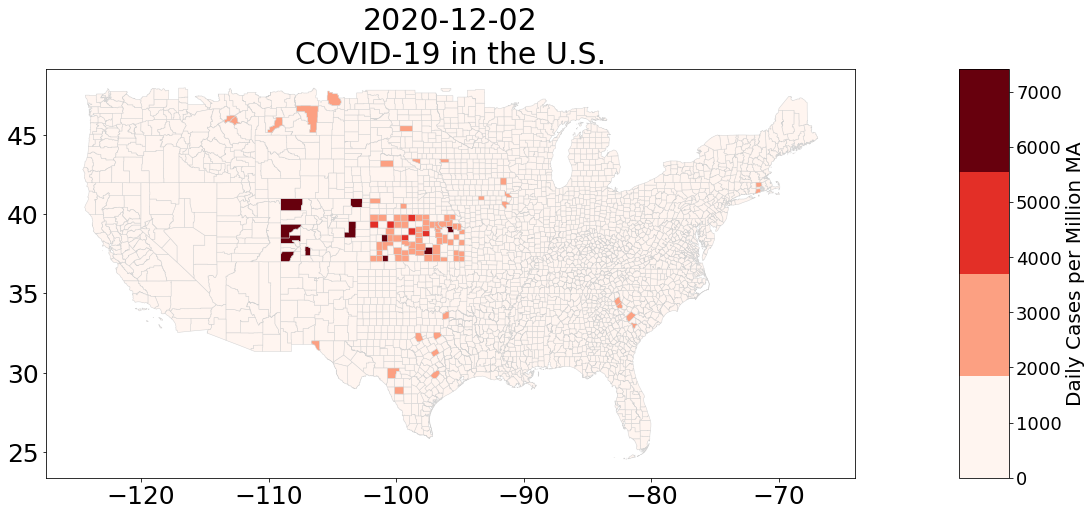

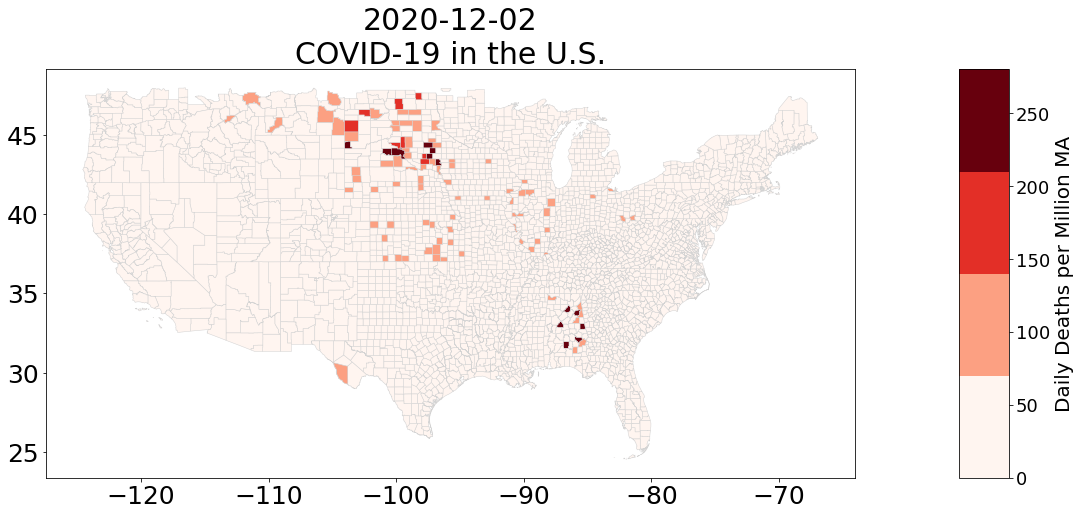

In [12]:
keys = ["Cases per Million", "Deaths per Million", 
        "Daily Cases per Million MA", "Daily Deaths per Million MA"]
for key in keys:
    log = False if "Daily" in key else True
    fig, ax = plt.subplots(figsize=(19,9),
        subplot_kw = {'aspect': 'equal'})   
    plt.rcParams.update({"font.size": 30})
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    df = covid_data[covid_data.index.get_level_values("date")==date].replace(0,1)
    # set range of colorbar
    vmin = 1 if log else 0 
    vmax = df[key].max()
    cmap = cm.get_cmap('Reds', 4)
    if log:
        norm = cm.colors.LogNorm(vmin=vmin, vmax =vmax)
    else:
        norm = cm.colors.Normalize(vmin = vmin, vmax = vmax)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # empty array for the data range
    sm._A = []
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%" 
    cax = divider.append_axes("right", size = size, pad = 0.1)
    # add colorbar to figure
    cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)

    # format colorbar values as int
    cbar.ax.set_yticklabels([int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize = 20)


    df.plot(ax=ax, cax = cax, column=key, vmin=vmin ,vmax = vmax, 
                 cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
                 norm = norm)
    ax.set_title(str(date)[:10] + "\n" + "COVID-19 in the U.S.", fontsize = 30)

    plt.show()
    plt.close()

### Question 2

#### Select a different time series data (e.g., unemployment, incomes, etc...) set at the county level that has at least 20 observations. Create a map of the latest obervation of the data. Like with the covid data in (1), create a file that holds a visualization for every observation.

In [1]:
import geopandas
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

fc_data = pd.read_csv("WIbeanyield.csv",
                    index_col = [0, 2])
def import_fc_data(filename, fips_code):

    fc_data = pd.read_csv("WIbeanyield.csv",
                    index_col = [0, 2])

    fc_data[fips_code] = fc_data[fips_code].astype(int)
    fc_data.set_index([fips_code, "date"], inplace = True)
    
    return fc_data

In [2]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    # import county level shapefile
    map_data = geopandas.read_file(filename = filename,                                   
                                   index_col = index_col)
    # rename fips code to match variable name in COVID-19 data
    map_data.rename(columns={"State":"state"},
                    inplace = True)
    # Combine statefips and county fips to create a single fips value
    # that identifies each particular county without referencing the 
    # state separately
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + \
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    # set FIPS as index
    map_data.set_index(FIPS_name, inplace=True)
    
    return map_data

fips_name = "fips_code" 

In [3]:
map_data = import_geo_data(filename = "countiesWithStatesAndPopulation.shp",
                    index_col = "date", FIPS_name = fips_name)

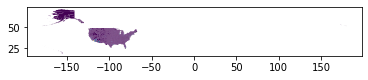

In [4]:
map_data.plot(column = "Population")

In [5]:
dates = [
        "2007",
        "2006",
        "2005",
        "2004",
        "2003",
        "2002",
        "2001",
        "2000",
        "1999",
        "1998",
        "1997",
        "1996",
        "1995",
        "1994",
        "1993",
        "1992",
        "1991"]

In [6]:
def create_fc_geo_dataframe(wheat_data, map_data, dates):

    data_frame_initialized = False
    counties = fc_data.groupby("fips_code").mean().index
    for date in dates:
       
        agg_df = map_data.loc[counties]
        agg_df["date"] = date
        if data_frame_initialized == False:
            #Create new dataframe
            matching_gpd = geopandas.GeoDataFrame(agg_df, crs = map_data.crs)
            data_frame_initialized = True        
        
        else:
       
            matching_gpd = matching_gpd.append(agg_df, ignore_index = False)
    # reset index, then set to [fips, date]
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["fips_code", "date"], inplace = True)
    
    for key, val in wheat_data.items():
        matching_gpd[key] = val
    return matching_gpd

# dates will be used to create a geopandas DataFrame with multiindex 
dates = fc_data.groupby("date").mean().index
fc_data = create_fc_geo_dataframe(fc_data, map_data, dates)

In [7]:

fc_data 

,,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry,County,Yield
fips_code,date,,,,,,,,,,,,,
55001,1974,55,001,01581060,0500000US55001,Adams,06,1672240387,108332661,20220.0,Wisconsin,"POLYGON ((-90.02638 44.08721, -90.02595 44.091...",ADAMS,2.50
55005,1974,55,005,01581062,0500000US55005,Barron,06,2235229317,69246614,45244.0,Wisconsin,"POLYGON ((-92.15673 45.34610, -92.15665 45.352...",BARRON,2.22
55009,1974,55,009,01581064,0500000US55009,Brown,06,1372933176,221808928,264542.0,Wisconsin,"POLYGON ((-88.25256 44.67981, -88.24762 44.679...",BROWN,2.50
55011,1974,55,011,01581065,0500000US55011,Buffalo,06,1750286266,87554072,13031.0,Wisconsin,"POLYGON ((-92.08384 44.41200, -92.08310 44.414...",BUFFALO,2.00
55013,1974,55,013,01581066,0500000US55013,Burnett,06,2127826487,151944426,15414.0,Wisconsin,"POLYGON ((-92.88571 45.64602, -92.88442 45.652...",BURNETT,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55133,2007,55,133,01581126,0500000US55133,Waukesha,06,1423769192,79818045,404198.0,Wisconsin,"POLYGON ((-88.54215 42.90499, -88.54206 42.927...",NaN,NaN
55135,2007,55,135,01581127,0500000US55135,Waupaca,06,1936513127,45278483,50990.0,Wisconsin,"POLYGON ((-89.22472 44.25691, -89.22447 44.272...",NaN,NaN
55137,2007,55,137,01581128,0500000US55137,Waushara,06,1621742033,29104777,24443.0,Wisconsin,"POLYGON ((-89.59803 44.11198, -89.59770 44.156...",WAUSHARA,4.50


Text(0.5, 1.0, '2007\nBeans Yield in Wisconsin')

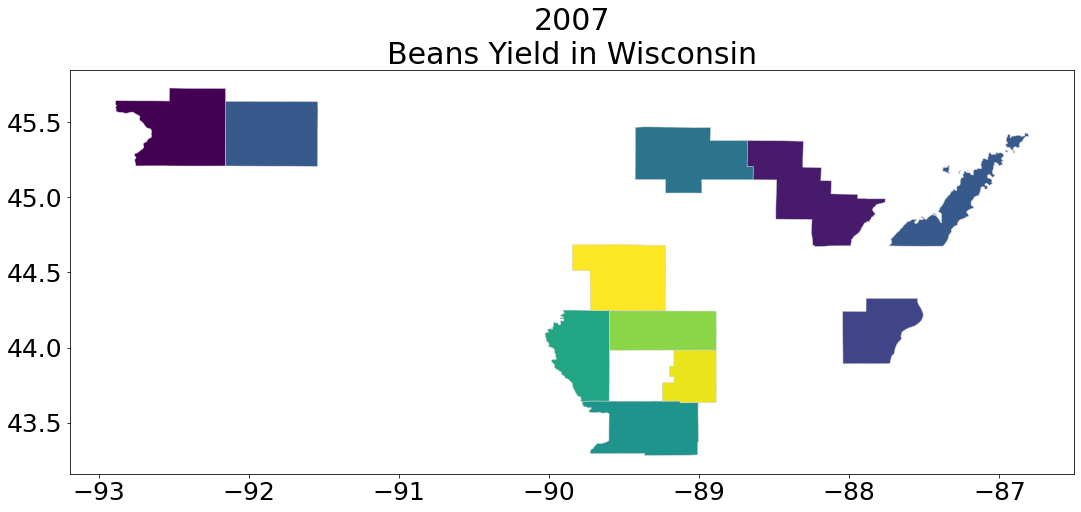

In [8]:
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

# . . . to end of script
# choose most recent date in data
date = dates[-1]

# choose map bounds
if "map_bounded" not in locals():
    minx = -127
    miny = 23
    maxx = -66
    maxy = 50
    
    fc_data = select_data_within_bounds(fc_data, minx, miny, maxx, maxy)
    map_bounded = True
    
fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Yield"
df = fc_data[fc_data.index.get_level_values("date") == date]
df.plot(ax=ax, cax = ax, column=key, linewidth=.5, 
             edgecolor='lightgrey')
ax.set_title(str(date) + "\n" + "Beans Yield in Wisconsin", fontsize = 30)

Text(0.5, 1.0, '2007\nBeans Yield in Wisconsin.')

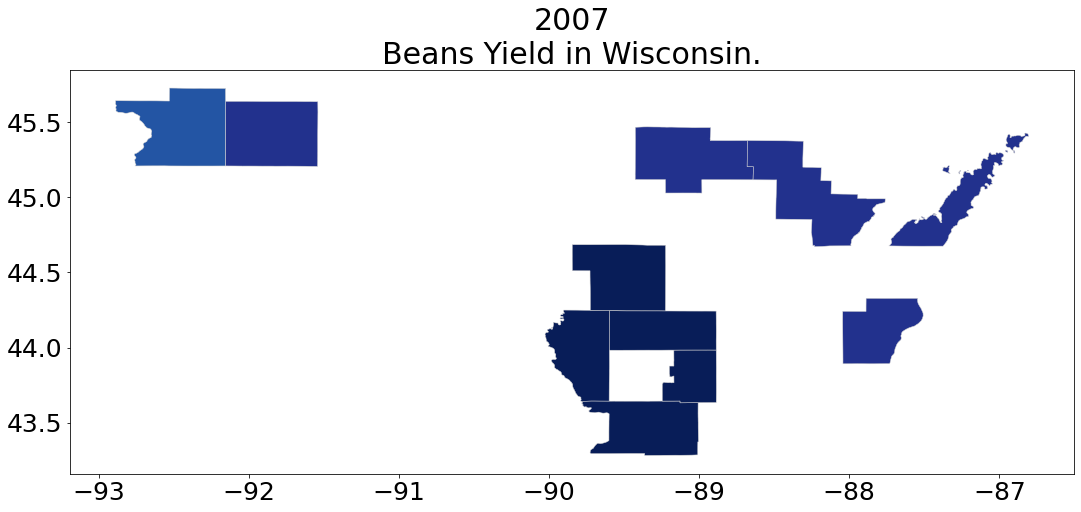

In [9]:
fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Yield"
# change colors, divide into n distinct colors
cmap = cm.get_cmap('YlGnBu', 10)
vmin = 0.1
vmax = df[key].max()

norm = cm.colors.LogNorm(vmin=vmin, vmax =vmax)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)
df = fc_data[fc_data.index.get_level_values("date") == date]
df.plot(ax=ax, cax = ax, column=key, vmin=vmin ,vmax = vmax, 
             cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
             norm = norm)

ax.set_title(str(date) + "\n" + "Beans Yield in Wisconsin.", fontsize = 30)

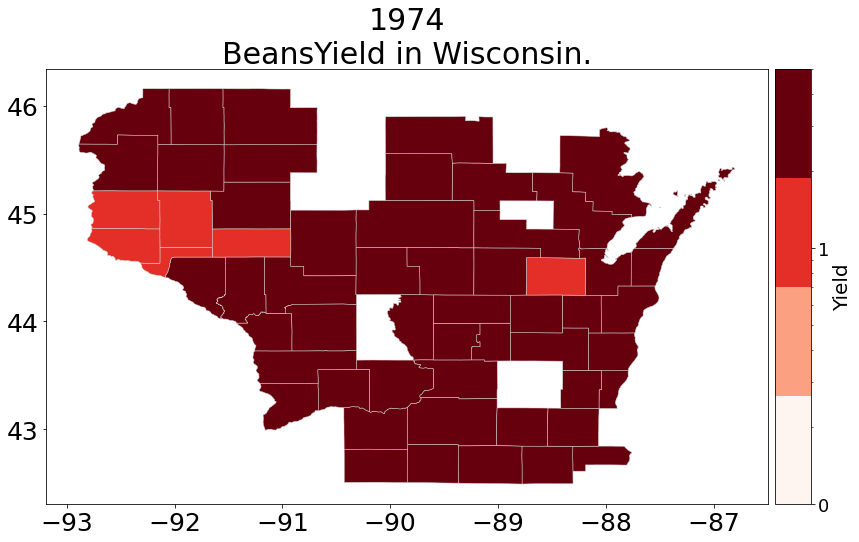

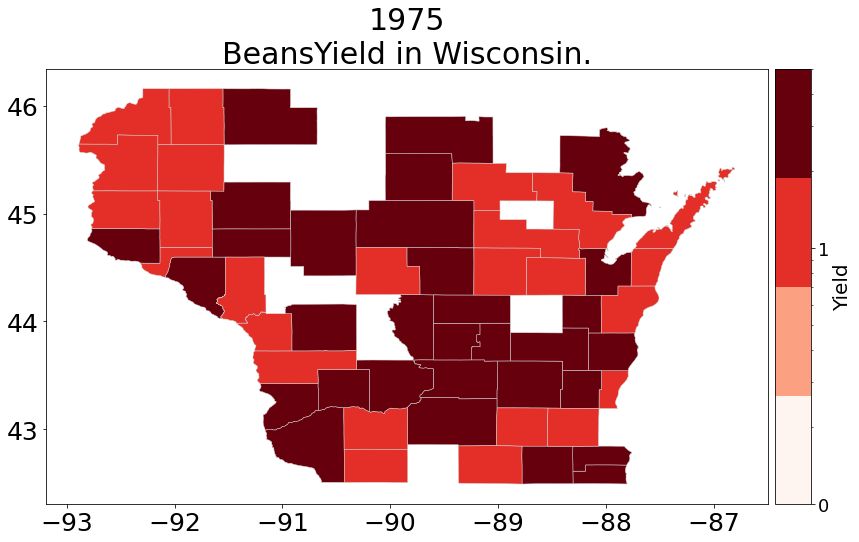

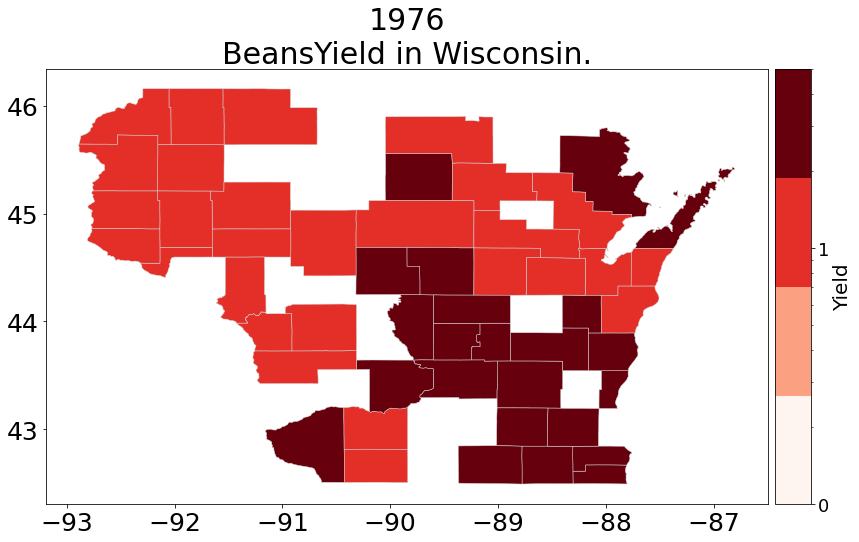

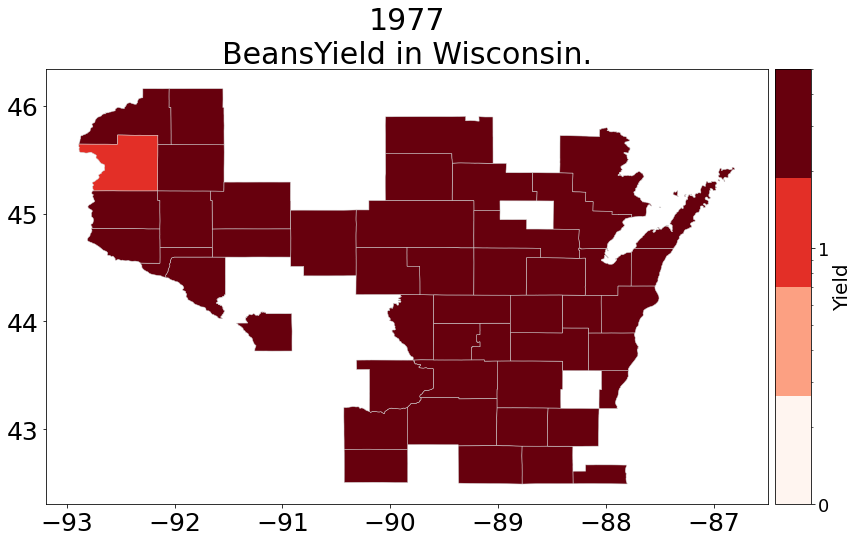

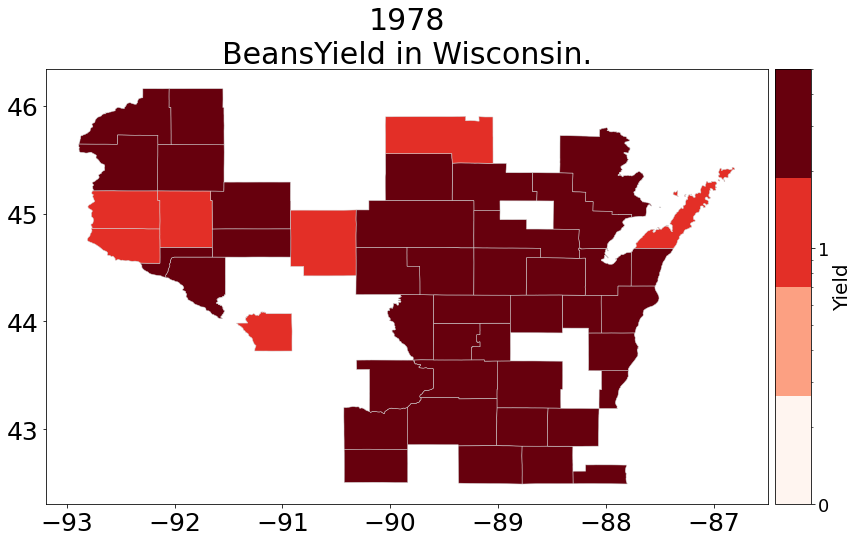

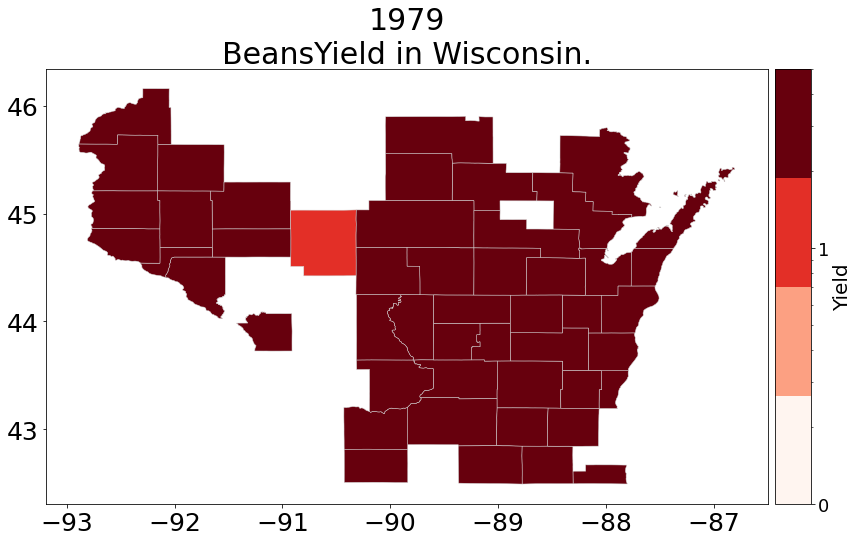

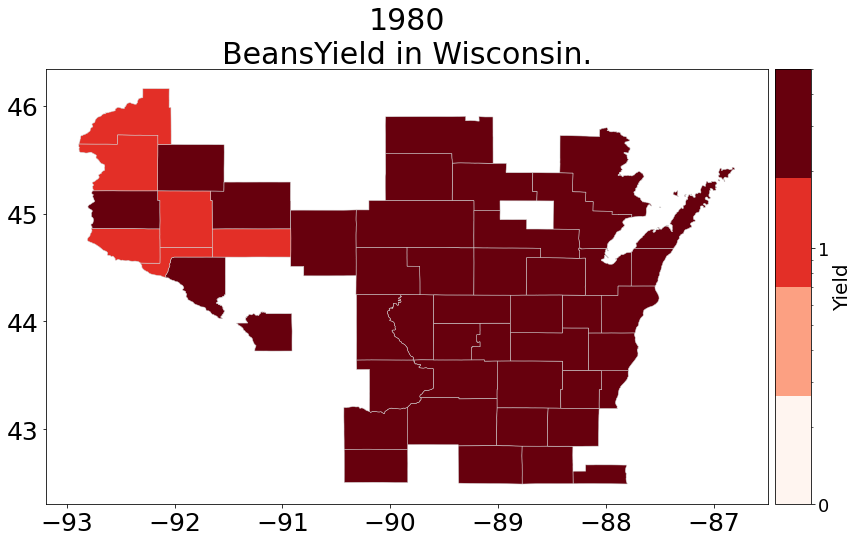

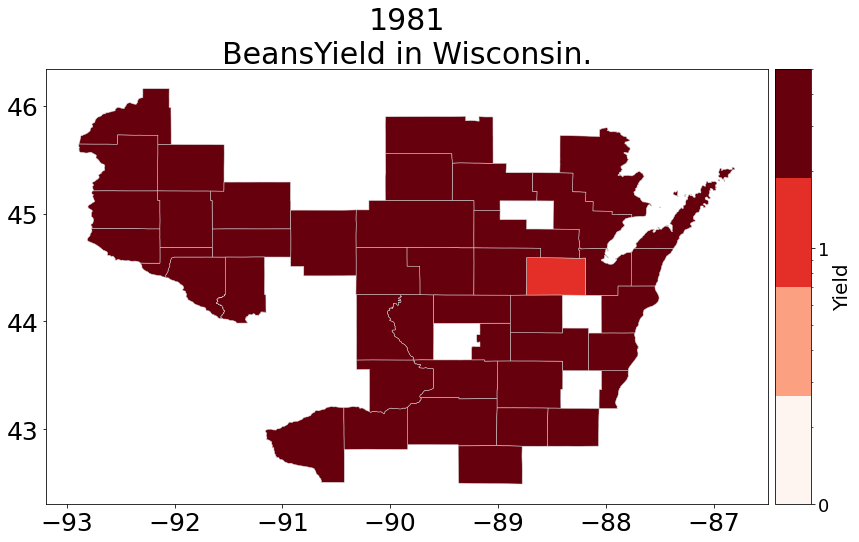

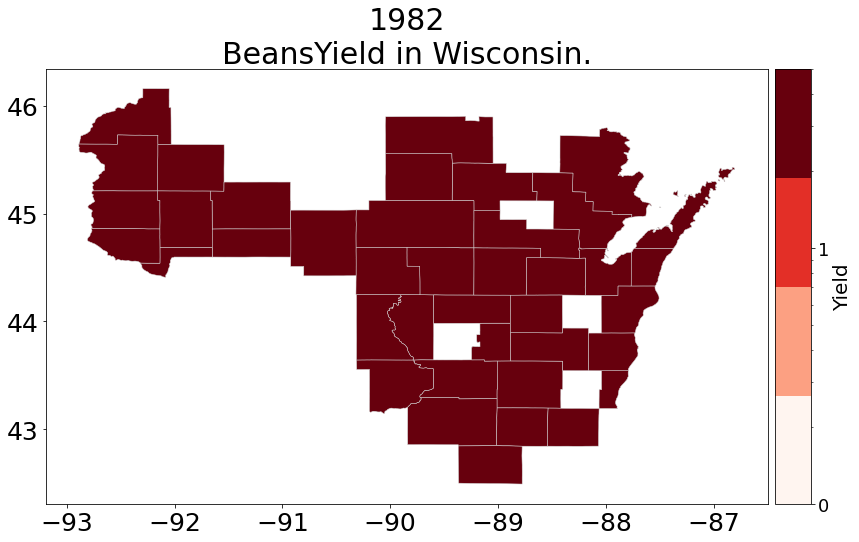

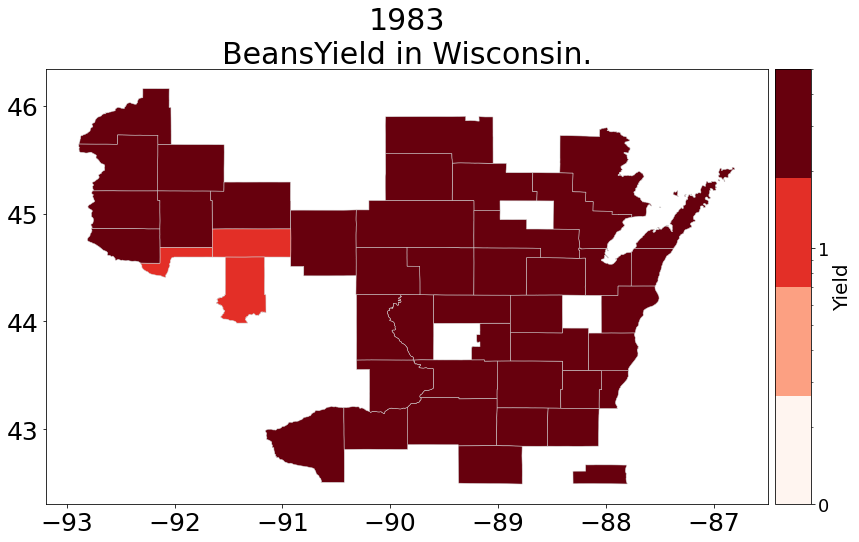

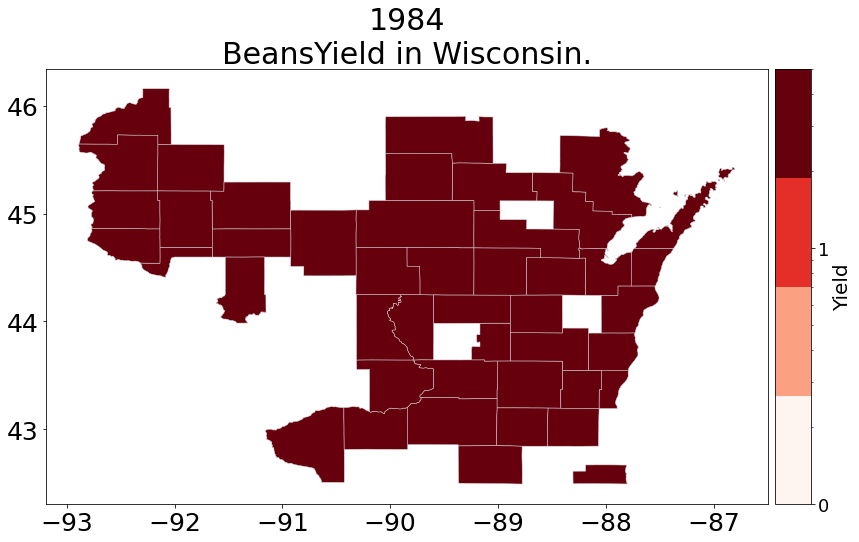

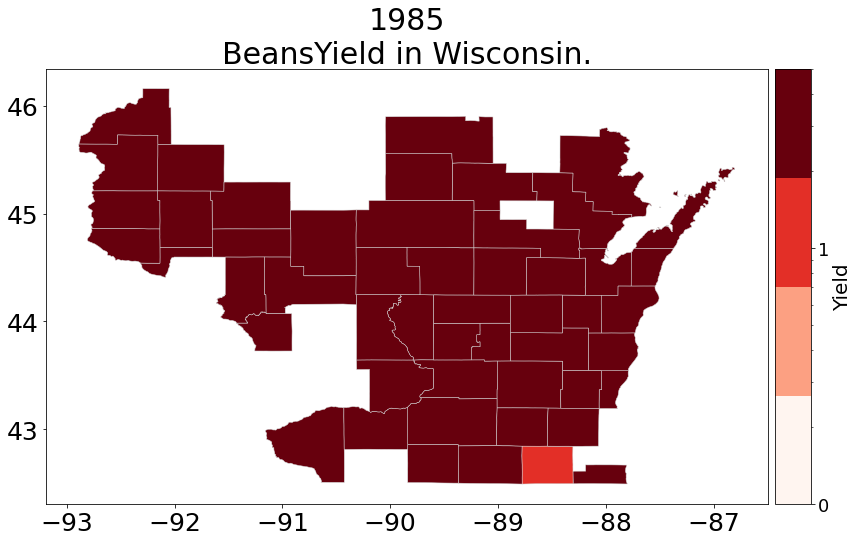

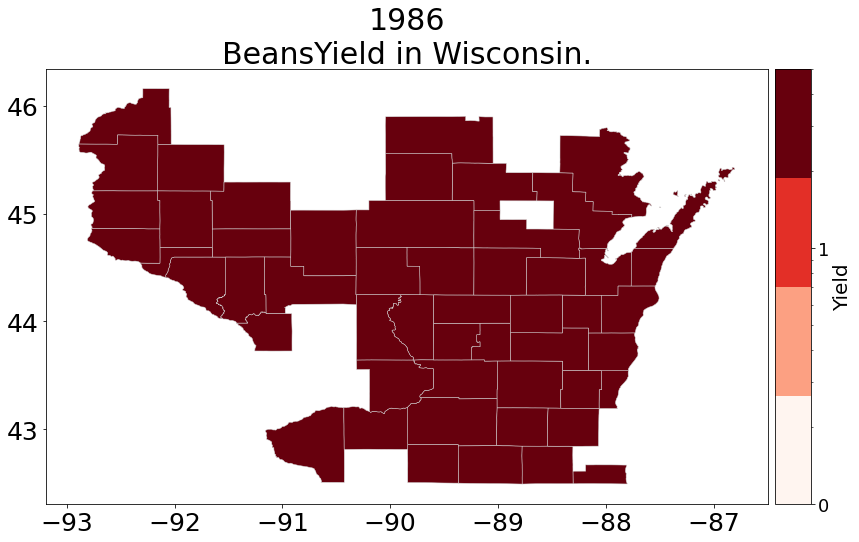

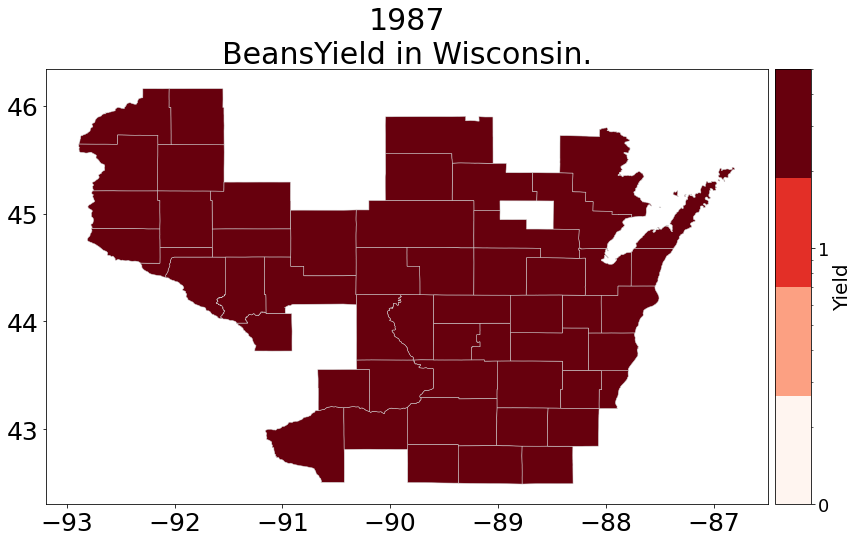

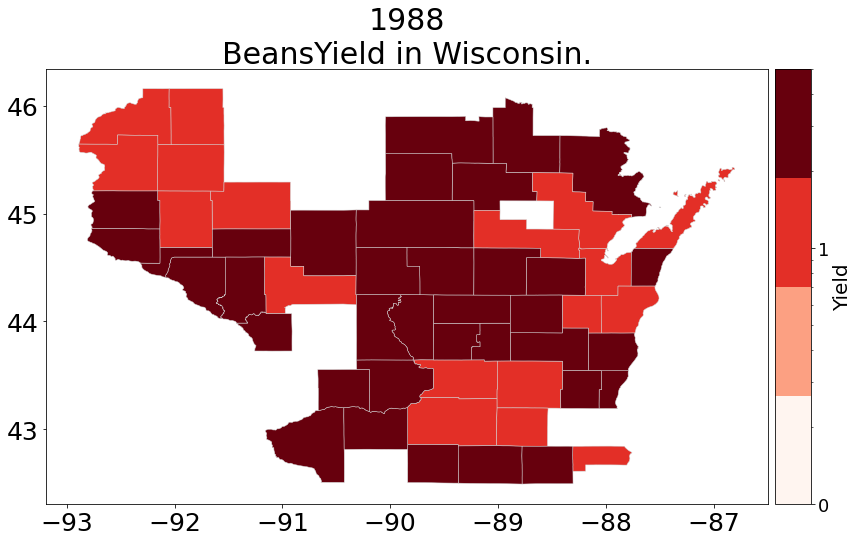

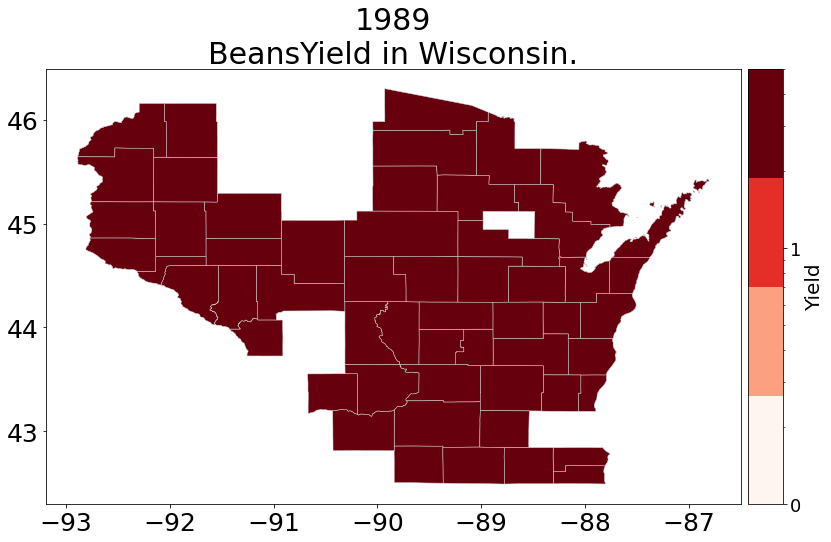

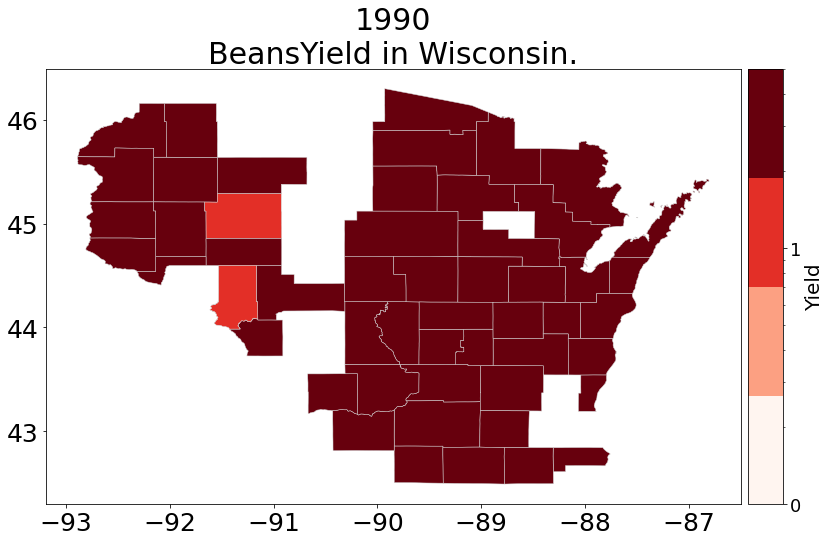

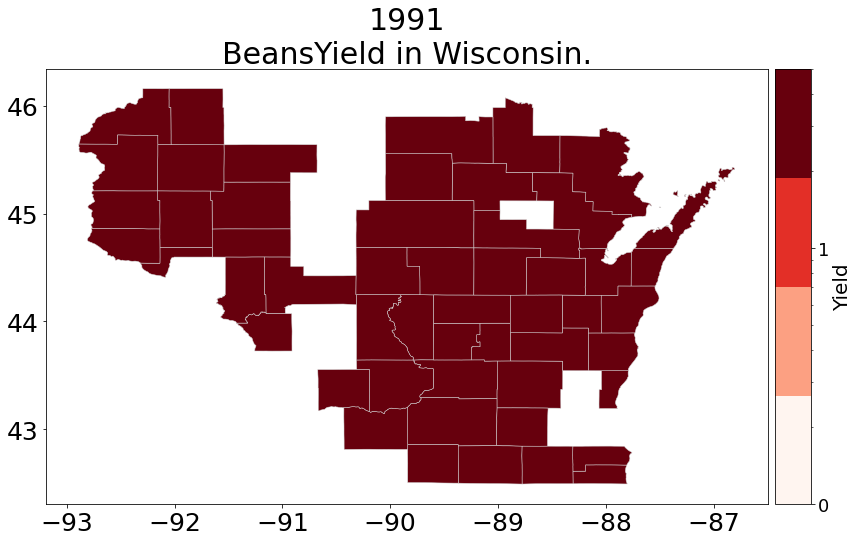

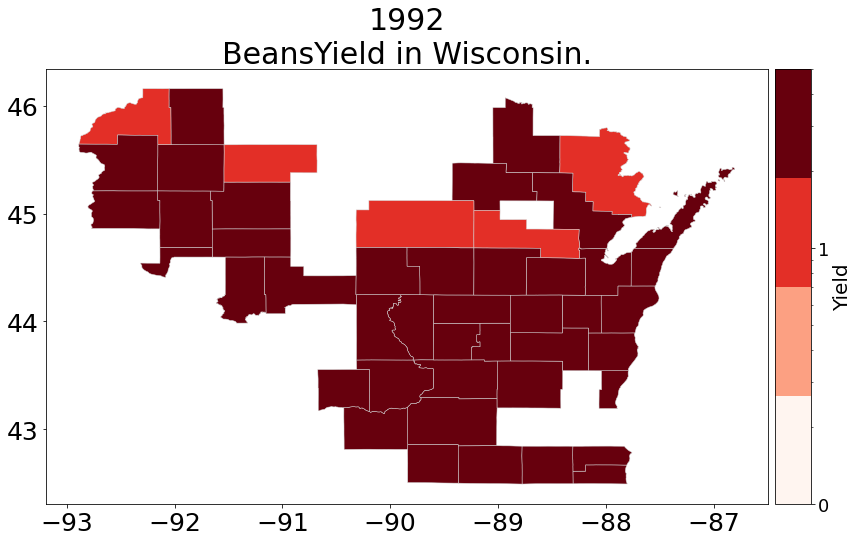

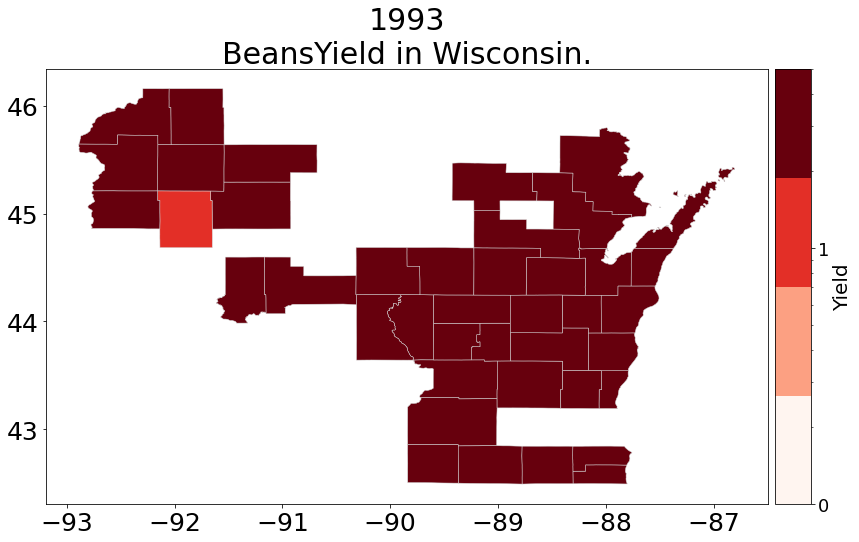

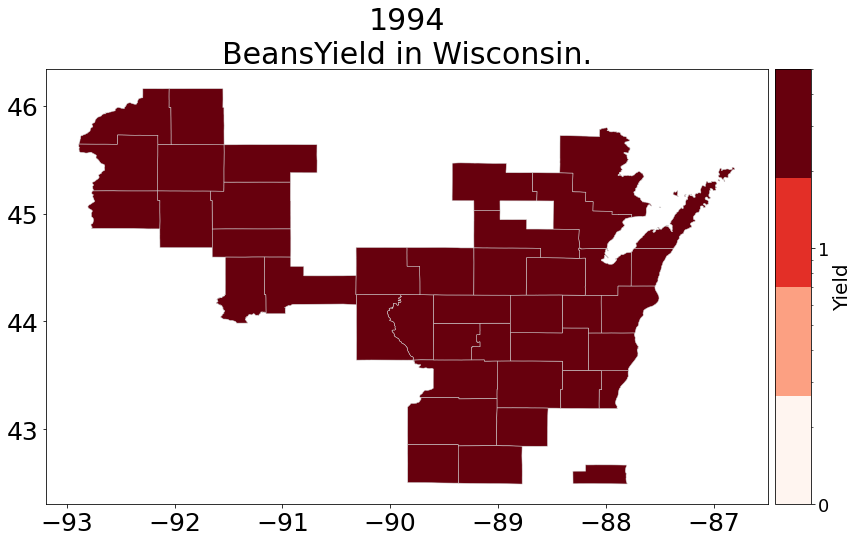

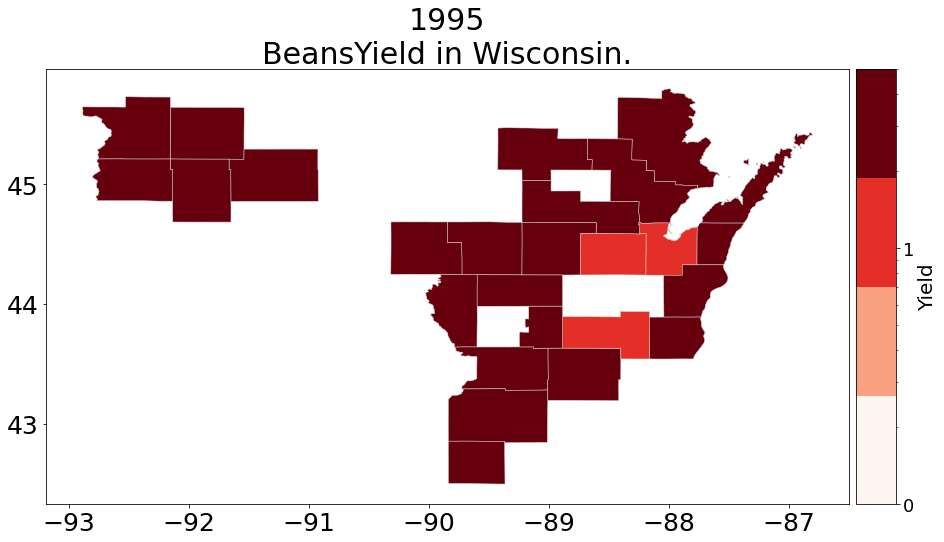

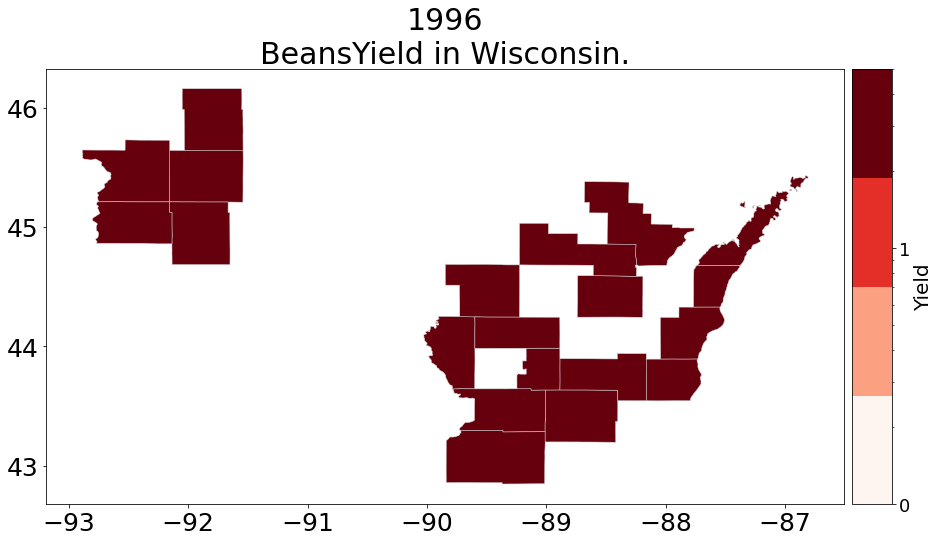

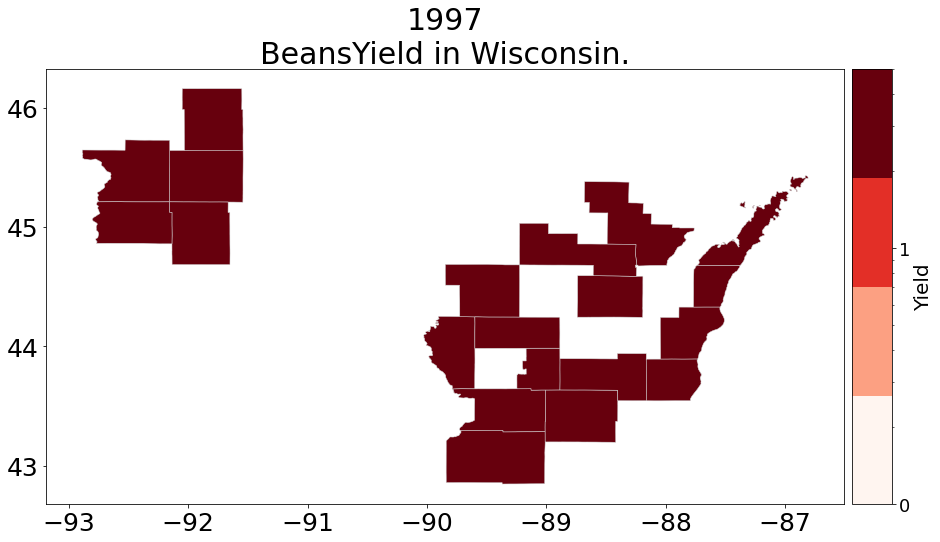

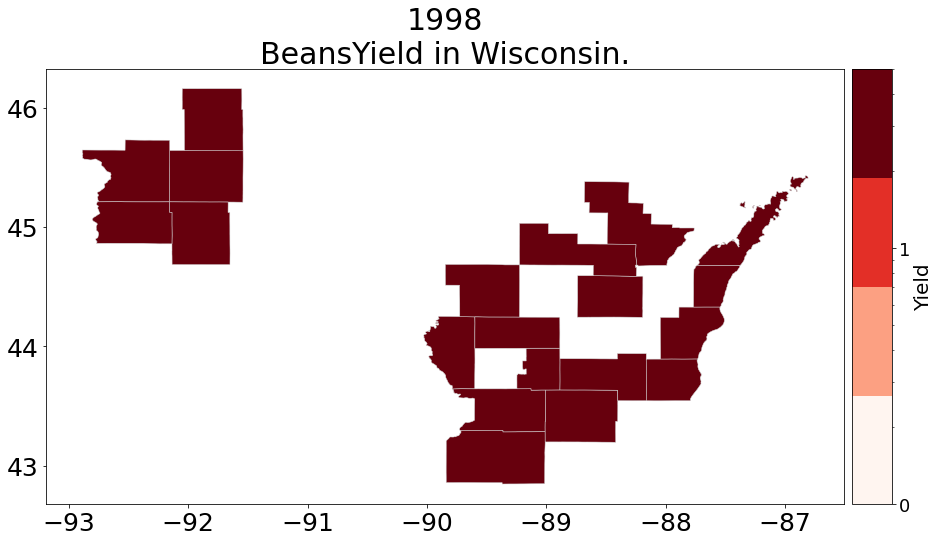

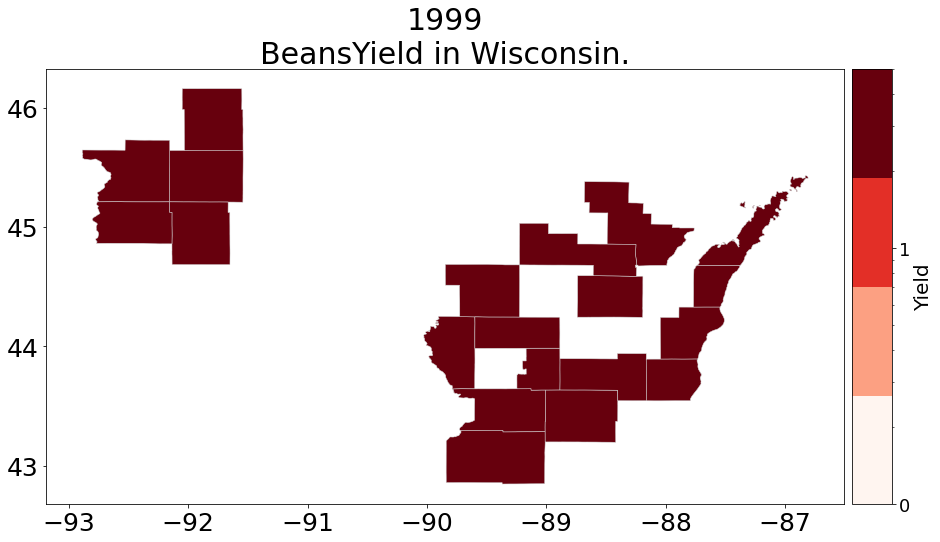

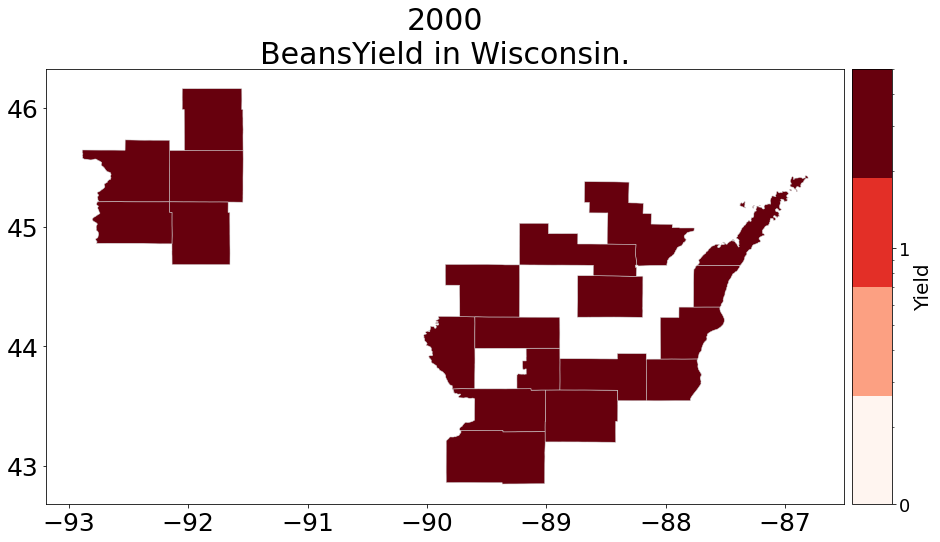

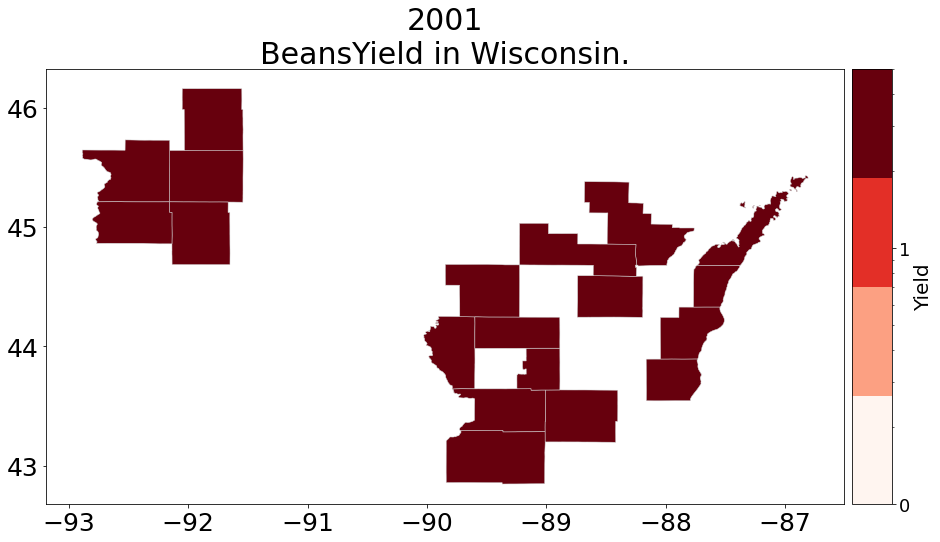

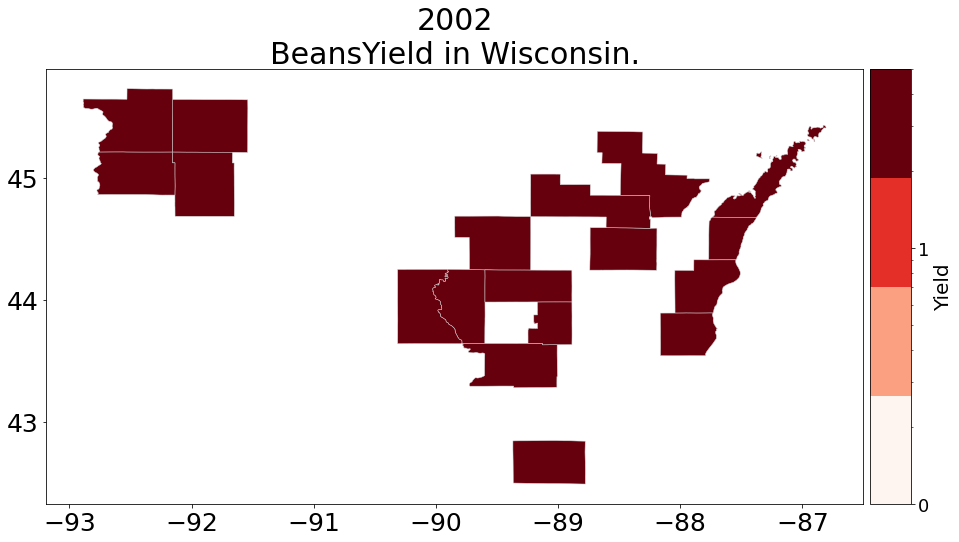

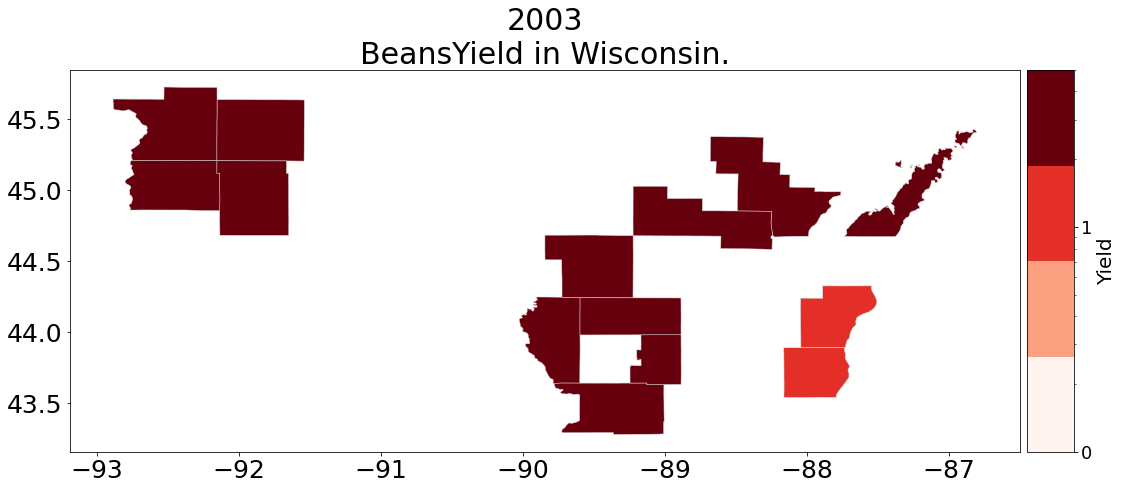

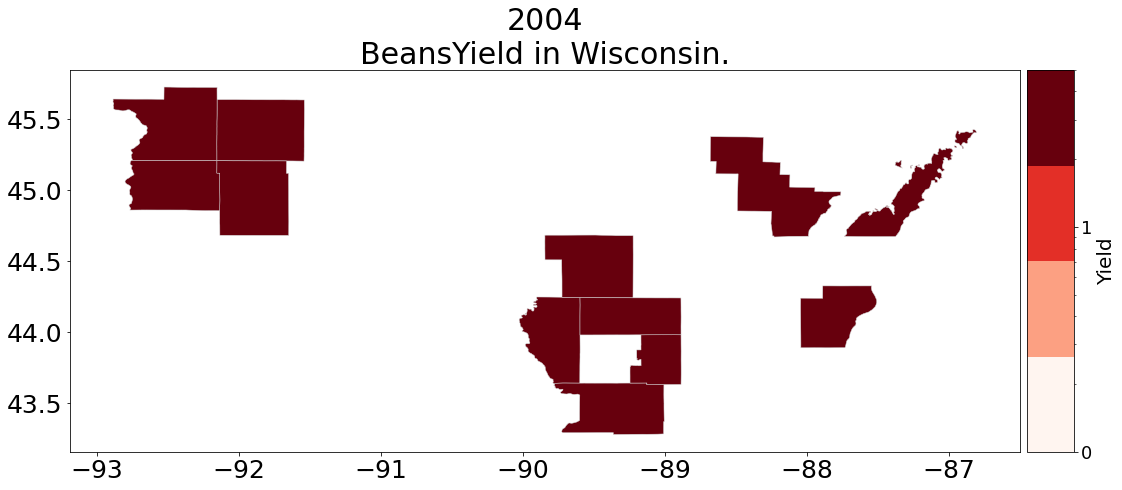

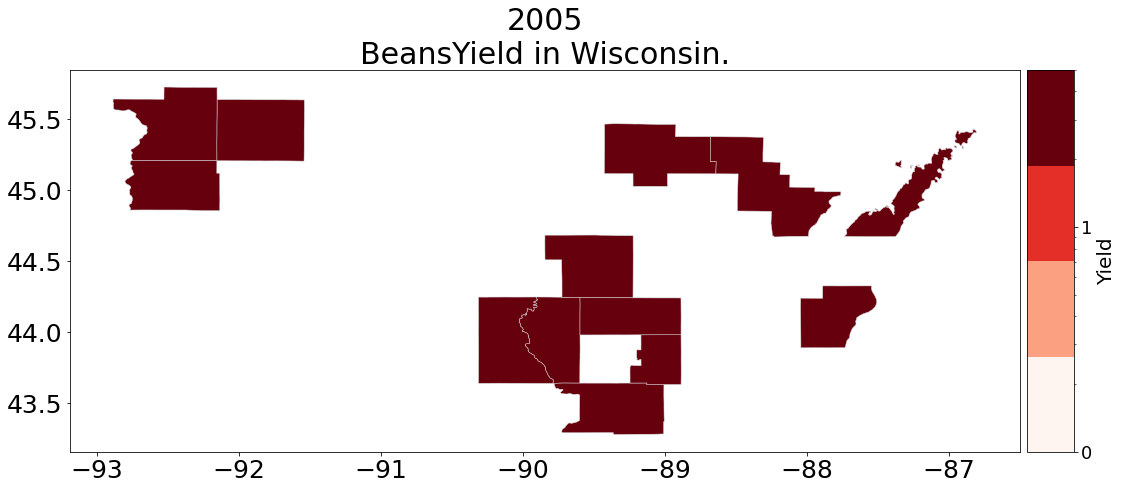

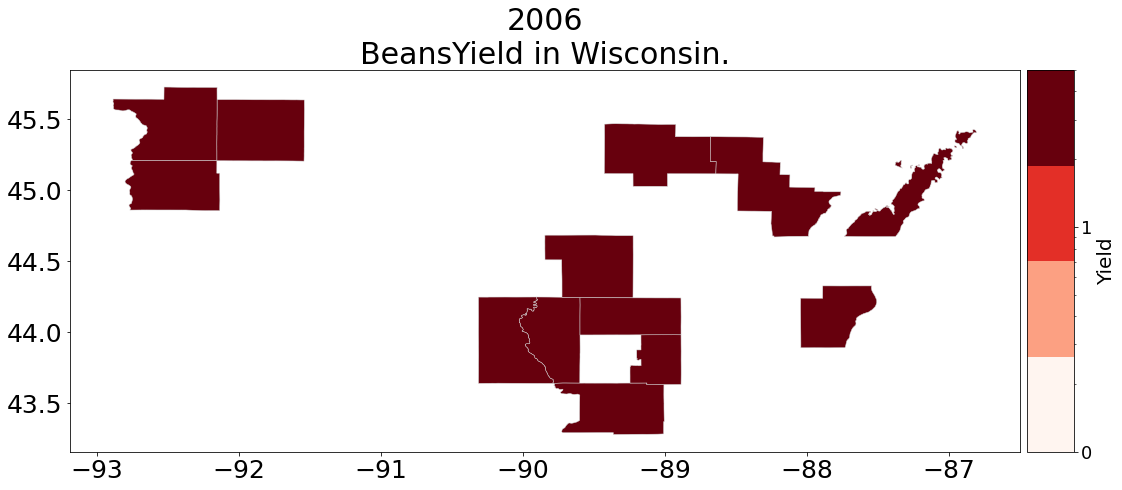

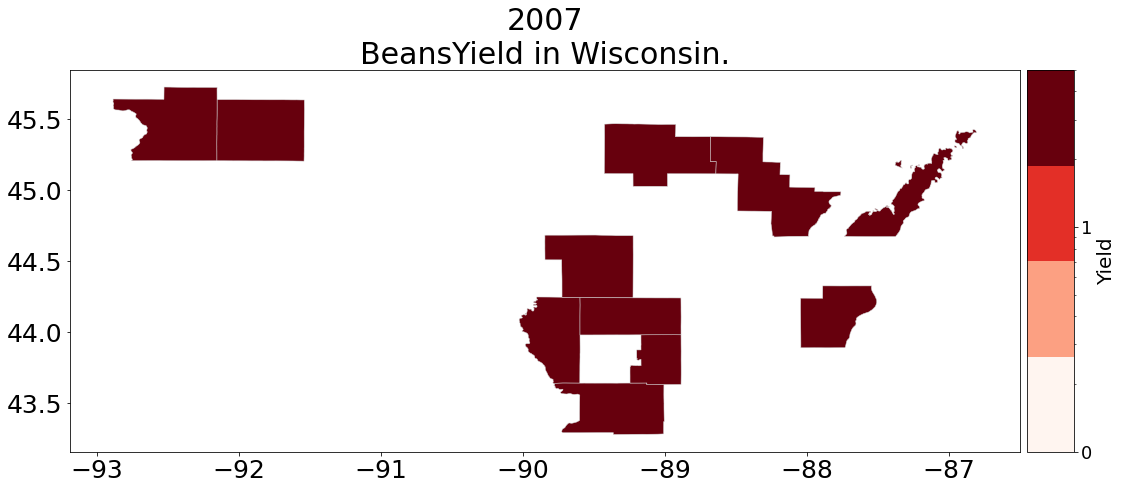

In [12]:
import numpy as np
import pandas as pd
import geopandas

# download the data 
import datadotworld as dw

import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

# visualization for homework 
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick


keys = ["Yield"]
pp = PdfPages("BeansYield in Wisconsin")

for date in dates:
    fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
    plt.rcParams.update({"font.size": 30})
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
   

    df = fc_data[ fc_data.index.get_level_values("date")==date].replace(0,1)
    # set range of colorbar
    vmin = 0
    vmax = df[key].max()
    # choose colormap
    cmap = cm.get_cmap('Reds', 4)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%" 
    cax = divider.append_axes("right", size = size, pad = 0.1)
    # add colorbar to figure
    cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)

    # format colorbar values as int
    cbar.ax.set_yticklabels([int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize = 20)


    df.plot(ax=ax, cax = cax, column=key, vmin=vmin ,vmax = vmax, 
                 cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
                 norm = norm)
    ax.set_title(str(date)[:10] + "\n" + "BeansYield in Wisconsin.", fontsize = 30)

    plt.show()
    plt.close()

### Question 3
Download and plot data relating to the magnitude of the policy response by U.S. state or by all nations across the globe. Plot the data on a map as it changes over time using an MP4 file or a GIF

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

data = pd.read_csv("OxCGRT.csv",
                    index_col = [1, 4], parse_dates = True)
data


C:\Users\Shane\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


CountryName RegionName RegionCode  C1_School closing  \
CountryCode Date                                                              
ABW         2020-01-01       Aruba        NaN        NaN                0.0   
            2020-01-02       Aruba        NaN        NaN                0.0   
            2020-01-03       Aruba        NaN        NaN                0.0   
            2020-01-04       Aruba        NaN        NaN                0.0   
            2020-01-05       Aruba        NaN        NaN                0.0   
...                            ...        ...        ...                ...   
ZWE         2020-11-11    Zimbabwe        NaN        NaN                NaN   
            2020-11-12    Zimbabwe        NaN        NaN                NaN   
            2020-11-13    Zimbabwe        NaN        NaN                NaN   
            2020-11-14    Zimbabwe        NaN        NaN                NaN   
            2020-11-15    Zimbabwe        NaN        NaN                NaN   

                        C1_Flag  C2_Workplace closing  C2_Flag  \
CountryCode Date                                                 
ABW         2020-01-01      NaN                   0.0      NaN   
            2020-01-02      NaN                   0.0      NaN   
            2020-01-03      NaN                   0.0      NaN   
            2020-01-04      NaN                   0.0      NaN   
            2020-01-05      NaN                   0.0      NaN   
...                         ...                   ...      ...   
ZWE         2020-11-11      NaN                   NaN      NaN   
            2020-11-12      NaN                   NaN      NaN   
            2020-11-13      NaN                   NaN      NaN   
            2020-11-14      NaN                   NaN      NaN   
            2020-11-15      NaN                   NaN      NaN   

                        C3_Cancel public events  C3_Flag  \
CountryCode Date                                           
ABW         2020-01-01                      0.0      NaN   
            2020-01-02                      0.0      NaN   
            2020-01-03                      0.0      NaN   
            2020-01-04                      0.0      NaN   
            2020-01-05                      0.0      NaN   
...                                         ...      ...   
ZWE         2020-11-11                      NaN      NaN   
            2020-11-12                      NaN      NaN   
            2020-11-13                      NaN      NaN   
            2020-11-14                      NaN      NaN   
            2020-11-15                      NaN      NaN   

                        C4_Restrictions on gatherings  ...  StringencyIndex  \
CountryCode Date                                       ...                    
ABW         2020-01-01                            0.0  ...              0.0   
            2020-01-02                            0.0  ...              0.0   
            2020-01-03                            0.0  ...              0.0   
            2020-01-04                            0.0  ...              0.0   
            2020-01-05                            0.0  ...              0.0   
...                                               ...  ...              ...   
ZWE         2020-11-11                            NaN  ...              NaN   
            2020-11-12                            NaN  ...              NaN   
            2020-11-13                            NaN  ...              NaN   
            2020-11-14                            NaN  ...              NaN   
            2020-11-15                            NaN  ...              NaN   

                        StringencyIndexForDisplay  StringencyLegacyIndex  \
CountryCode Date                                                           
ABW         2020-01-01                        0.0                    0.0   
            2020-01-02                        0.0                    0.0   
            2020-01-03 

In [106]:
df_keys = list(data.keys())
# list = {"CountryName", "RegionName", "RegionCode"}
# for key in list:
    # df_keys.remove(key)


In [107]:
data = pd.read_csv("OxCGRT.csv",
                    index_col = [1, 4], parse_dates = True,
                                 dtype={key:float for key in df_keys})
data

C:\Users\Shane\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


CountryName RegionName RegionCode  C1_School closing  \
CountryCode Date                                                              
ABW         2020-01-01       Aruba        NaN        NaN                0.0   
            2020-01-02       Aruba        NaN        NaN                0.0   
            2020-01-03       Aruba        NaN        NaN                0.0   
            2020-01-04       Aruba        NaN        NaN                0.0   
            2020-01-05       Aruba        NaN        NaN                0.0   
...                            ...        ...        ...                ...   
ZWE         2020-11-11    Zimbabwe        NaN        NaN                NaN   
            2020-11-12    Zimbabwe        NaN        NaN                NaN   
            2020-11-13    Zimbabwe        NaN        NaN                NaN   
            2020-11-14    Zimbabwe        NaN        NaN                NaN   
            2020-11-15    Zimbabwe        NaN        NaN                NaN   

                        C1_Flag  C2_Workplace closing  C2_Flag  \
CountryCode Date                                                 
ABW         2020-01-01      NaN                   0.0      NaN   
            2020-01-02      NaN                   0.0      NaN   
            2020-01-03      NaN                   0.0      NaN   
            2020-01-04      NaN                   0.0      NaN   
            2020-01-05      NaN                   0.0      NaN   
...                         ...                   ...      ...   
ZWE         2020-11-11      NaN                   NaN      NaN   
            2020-11-12      NaN                   NaN      NaN   
            2020-11-13      NaN                   NaN      NaN   
            2020-11-14      NaN                   NaN      NaN   
            2020-11-15      NaN                   NaN      NaN   

                        C3_Cancel public events  C3_Flag  \
CountryCode Date                                           
ABW         2020-01-01                      0.0      NaN   
            2020-01-02                      0.0      NaN   
            2020-01-03                      0.0      NaN   
            2020-01-04                      0.0      NaN   
            2020-01-05                      0.0      NaN   
...                                         ...      ...   
ZWE         2020-11-11                      NaN      NaN   
            2020-11-12                      NaN      NaN   
            2020-11-13                      NaN      NaN   
            2020-11-14                      NaN      NaN   
            2020-11-15                      NaN      NaN   

                        C4_Restrictions on gatherings  ...  StringencyIndex  \
CountryCode Date                                       ...                    
ABW         2020-01-01                            0.0  ...              0.0   
            2020-01-02                            0.0  ...              0.0   
            2020-01-03                            0.0  ...              0.0   
            2020-01-04                            0.0  ...              0.0   
            2020-01-05                            0.0  ...              0.0   
...                                               ...  ...              ...   
ZWE         2020-11-11                            NaN  ...              NaN   
            2020-11-12                            NaN  ...              NaN   
            2020-11-13                            NaN  ...              NaN   
            2020-11-14                            NaN  ...              NaN   
            2020-11-15                            NaN  ...              NaN   

                        StringencyIndexForDisplay  StringencyLegacyIndex  \
CountryCode Date                                                           
ABW         2020-01-01                        0.0                    0.0   
            2020-01-02                        0.0                    0.0   
            2020-01-03 

In [108]:
countries = response_data.groupby("CountryCode").mean().index
countries

Index(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'AUS', 'AUT',
       ...
       'UZB', 'VEN', 'VGB', 'VIR', 'VNM', 'VUT', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='CountryCode', length=187)

In [109]:
dates = response_data.groupby("Date")
dates

In [110]:
response_data.groupby("Date").sum()

,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,-137.50,0.00,-142.86,0.00,-140.47,0.00,-136.81,0.0,-162.5
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.44,19.44,27.39,27.39,14.88,14.88,17.36,17.36,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.56,5.56,9.52,9.52,3.57,3.57,4.17,4.17,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.78,2.78,4.76,4.76,5.35,5.35,6.25,6.25,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.11,11.11,14.28,14.28,7.14,7.14,8.33,8.33,0.0,0.0
2020-11-12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.70,3.70,7.14,7.14,4.17,4.17,4.86,4.86,0.0,0.0
2020-11-13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.77,2.77,2.85,2.85,1.78,1.78,2.09,2.09,0.0,0.0


In [ ]:
df = pd.DataFrame(data)

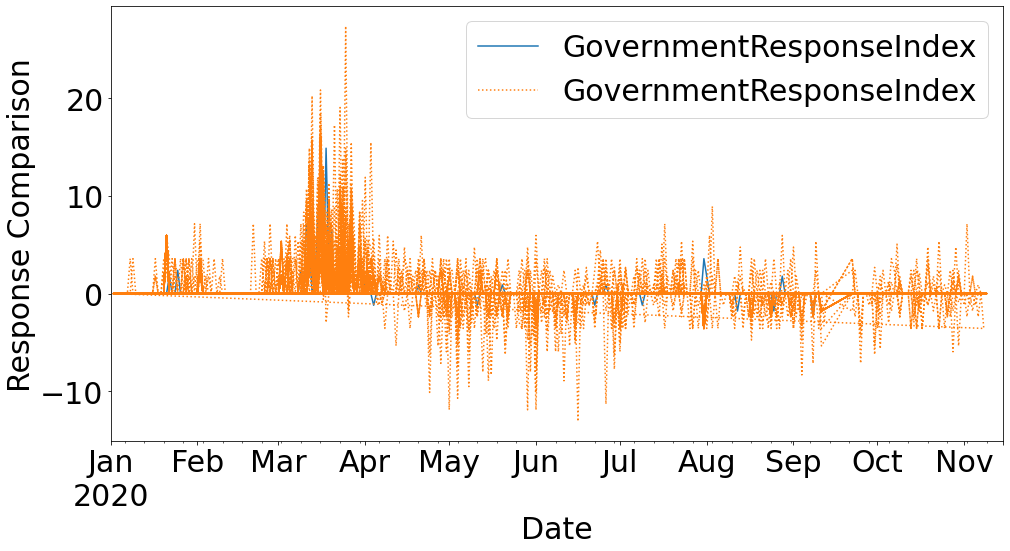

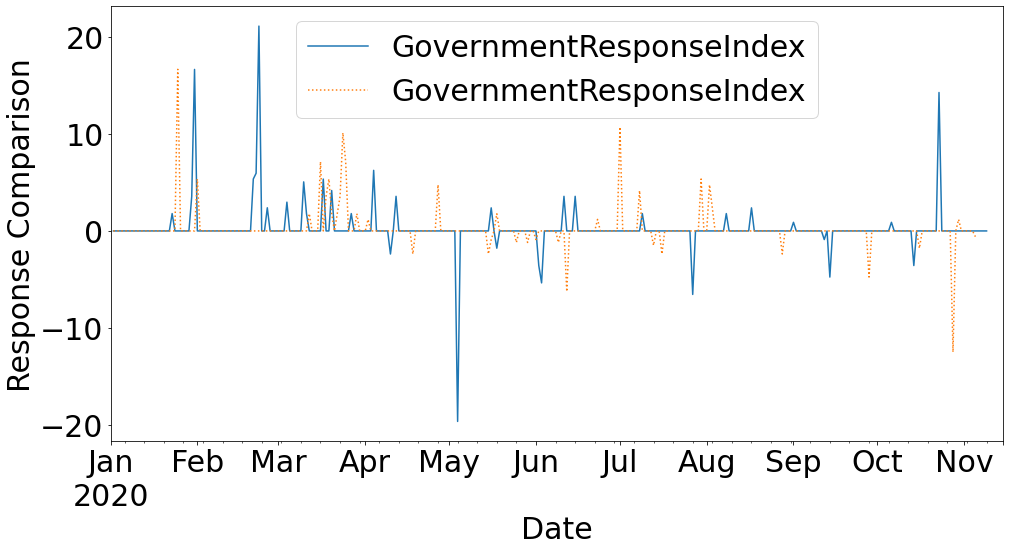

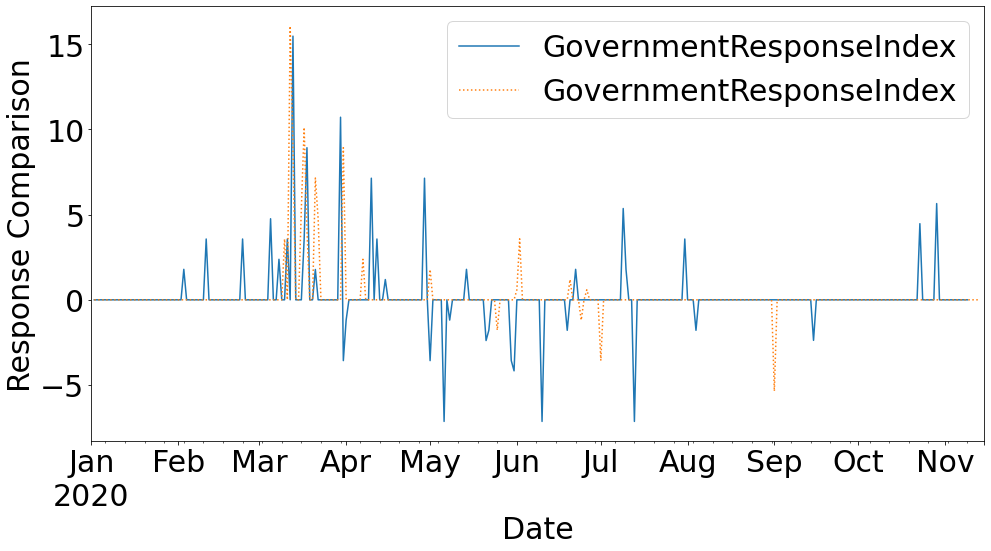

In [111]:
# pairs of countries to compare in plots
pairs = [("CAN", "USA"), ("ITA", "AUS"), ("BGR", "BOL")]
linestyles = ["-", ":"]

plt.rcParams.update({"font.size": 30})
for pair in pairs:
    fig, ax = plt.subplots(figsize= (16, 8))
    for i in range(len(pair)):
        country_code = pair[i]
        # gather country name associated with country_code
        country_name = df.loc[country_code]["CountryName"]
        linestyle = linestyles[i]
        # plot country, and all dataes (:)
        df.loc[country_code, :][["GovernmentResponseIndex"]].dropna(
            ).plot.line(ax = ax, label = country_name,
                       linestyle = linestyle)
    plt.xlim(["2020-01-01", "2020-11-15"])
    plt.ylabel("Response Comparison")
    plt.legend()
    plt.show()
    plt.close()